# How to train RT-DETR on a custom dataset

⚠️ Real-Time Detection Transformer (RT-DETR), developed by Baidu, is a cutting-edge end-to-end object detector that provides real-time performance while maintaining high accuracy.

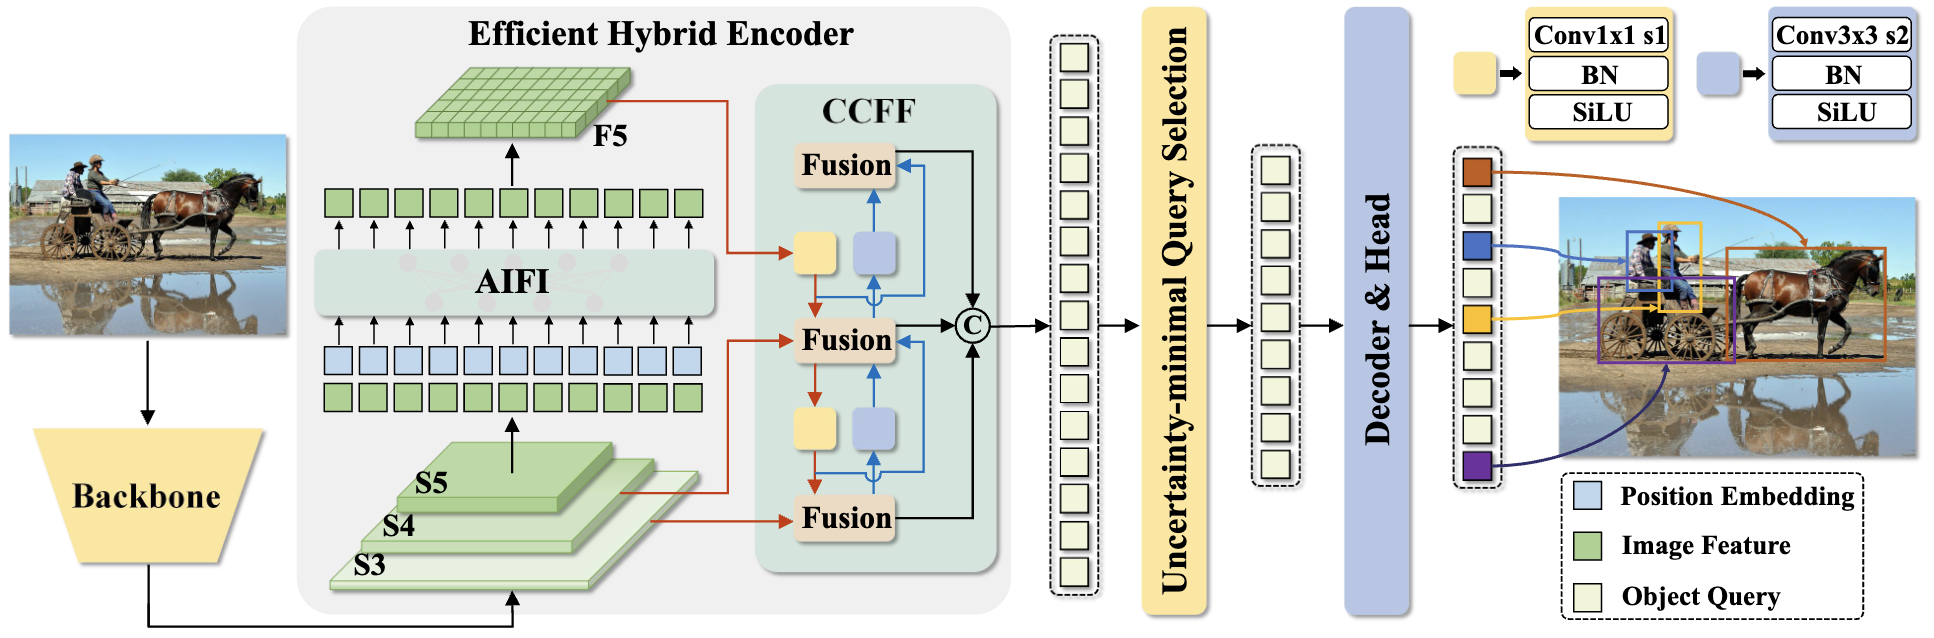

## Check if you have access to the GPU

In [1]:
!nvidia-smi

Wed Apr 17 16:10:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 ...    Off | 00000000:09:00.0  On |                  N/A |
|  0%   48C    P5              30W / 250W |    588MiB /  8192MiB |     30%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/tumwfml-ubunt6/OD_models/rt_detr


## Clone repository and Install Requirements

*   Clone repository
*   Install requirements

In [4]:
!git clone https://github.com/lyuwenyu/RT-DETR.git
%cd RT-DETR/rtdetr_pytorch/
!pip install -r requirements.txt -q

Cloning into 'RT-DETR'...
remote: Enumerating objects: 700, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 700 (delta 122), reused 105 (delta 102), pack-reused 515
Receiving objects: 100% (700/700), 485.71 KiB | 7.47 MiB/s, done.
Resolving deltas: 100% (336/336), done.
/home/tumwfml-ubunt6/OD_models/rt_detr/RT-DETR/rtdetr_pytorch


/home/tumwfml-ubunt6/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Install RoboFlow and download dataset

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FE5BTpDPsVb3G25cXEbq")
project = rf.workspace("loco-fml").project("loco-fml")
version = project.version(6)
dataset = version.download("coco")


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.5 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 KB 11.2 MB/s eta 0:00:00
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1


/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to LOCO-fml-6 in coco:: 100%|██████████| 8244/8244 [00:02<00:00, 4111.08it/s]


##  Training on single-gpu
*   Add -t path/to/checkpoint (optinal) to tuning rtdetr based on pretrained checkpoint
*   Find the path for the checkpoint here https://github.com/lyuwenyu/RT-DETR/tree/main/rtdetr_pytorch

Modify coco detection.yml:
*   config img_folder = /RT-DETR/rtdetr_pytorch/LOCO-fml-6/train/
*   ann_file = /RT-DETR/rtdetr_pytorch/LOCO-fml-6/train/_annotations.coco.json
*   num_classes = 6
*   Set remap_mscoco_category: False. This variable only works for ms-coco dataset.

Change epochs and batch size in /configs/rtdetr/include/optimizer.yml

In [3]:
# training on single-gpu
!export CUDA_VISIBLE_DEVICES=0
!python3 /home/tumwfml-ubunt6/OD_models/rt_detr/RT-DETR/rtdetr_pytorch/tools/train.py \
        -c /home/tumwfml-ubunt6/OD_models/rt_detr/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_6x_coco.yml \
        -t https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r18vd_dec3_6x_coco_from_paddle.pth

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Not init distributed mode.
Start training
Load PResNet18 state_dict
Tuning checkpoint from https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r18vd_dec3_6x_coco_from_paddle.pth
Load model.state_dict, {'missed': ['backbone.conv1.conv1_1.norm.num_batches_tracked', 'backbone.conv1.conv1_2.norm.num_batches_tracked', 'backbone.conv1.conv1_3.norm.num_batches_tracked', 'backbone.res_layers.0.blocks.0.short.norm.num_batches_tracked', 'backbone.res_layers.0.blocks.0.branch2a.norm.num_batches_tracked', 'backbone.res_layers.0.blocks.0.branch2b.norm.num_batches_tracked', 'backbone.res_layers.0.blocks.1.branch2a.norm.num_batches_tracked', 'backbone.res_layers.0.blocks.1.branch2b.norm.num_batches_tracked', 'backbone.res_layers.1.blocks.0.short.conv.norm.num_batc